**<font color="blue">Write a tutorial (with a data set and code sample) on something that we did not cover during the course that you think might be interesting to other people taking the course.</font>**
    
**<font color="blue">It can be a topic we didn’t cover at all, or can just go deeper into a topic that we did cover.</font>**

---

![](./ignore/isaac-smith-1182056-unsplash.jpg)
Photo by Isaac Smith on Unsplash

# Prophet-able Forecasting
## Getting started with `fbProphet`, Facebook's open source time series forecasting library 

### Outline

1. What is it
    *   
2. Why am i talking about it
    *  
3. What makes it different than what we've talked about already in class
    *  
4. Tutorial 1
    *  
    *  
5. Tutorial 2 - if time/space
    *  
    *  
6. Conclusion
    

---

If you google `time-series forecasting` most of the first search results you'll get will involve [autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) modeling (ARIMA) or [exponential smoothing](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/) (ETS). And with good reason! There are popular options available for performing time-series forecasting in both R and Python. One of the first forecasting tools I started playing around with are the ARIMA and ETS models in  the `forecast` package in R, led by the influential [Rob Hyndman](https://otexts.com/fpp2/). 

One of the more exhilarating options in [`forecast`](http://pkg.robjhyndman.com/forecast/) is to use [`auto.arima`](https://www.rdocumentation.org/packages/forecast/versions/8.7/topics/auto.arima). The name says it all; it will 'automatically' determine a best-fit ARIMA model, based on selected information criterion ([AIC, BIC, or AICc](http://www.koenbro.com/information-criteria-aic-aicc-bic/)). Time-series forecasting made easy! 

These days, though, I prefer to use Python. And with another quick google search I spot a [potential Python analog](https://www.alkaline-ml.com/pmdarima/). But for this post I'd like to spend our time with another forecasting procedure I've learned recently about, that's also available in Python: Facebook's `Prophet`.

## What's Prophet?

Prophet is a forecasting library developed by Facebook, introduced in 2017, with implementations in R and Python. It was developed with two goals in mind: First, to create high-quality forecasts for their business, that would easily scale. And second, to have a rigorous methodology behind the scenes, but have its parameter levers be intuitive enough for traditional business analysts to adjust.

For this post we will be doing a brisk quick-start, stream-of-consciousness style:
    - Getting installed in Python
    - Setting up your data
    - Looking at the results


### 1. Installation

    
If some of the following is a little terse for your taste, I just followed directions on Prophet's project page at [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/).

To preface: I'm on a Mac, so YMMV.

I went to the Installation page on the project's github.io site, found [here](https://facebook.github.io/prophet/docs/installation.html), and followed the directions for Python. As mentioned there, the library is majorly dependent on `pystan`. I actually missed the part where it says to `pip install pystan` first before pip installing `fbprophet` (the actual name of the Python library), and DID THE EXACT OPPOSITE, and things were NOT HAPPY.

BUT:

I'm on the Anaconda distribution of Python, so I was able to eventually get everything working by following the Anaconda instructions. 

In terminal:

```conda install gcc```

...and then following the prompts accordingly.

and then:  
```install -c conda-forge fbprophet```

Phew! That was close. Was afraid the post was going to end right here.


### 2. Setting up your data

There is a handy-dandy [Quick-Start](https://facebook.github.io/prophet/docs/quick_start.html#python-api) that I ran through to sniff-test that everything worked as intended. I'll leave it up to you, dear reader, to do the same. What I DO want to do is walk through some additional datasets to start getting used to the API.

#### Dataset 1: Re**cycle**d jokes - Looking at bike share rental trips

For this first dataset we are looking at a dataset on bike share trips in Los Angeles. I pulled down a `.csv` from Kaggle. Don't tell anyone, but I believe I'm the first person to have ever though of this. Seriously though, I would have loved to have scraped something, but ran out of time.

You can find the data [here](https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data/downloads/los-angeles-metro-bike-share-trip-data.zip/26).

If you have the Kaggle API installed you can just download directly to your folder of choice by copying the API command:  
![](./images/api_cmd_small.png)

and then pasting into terminal and running, like so:  
`kaggle datasets download -d cityofLA/los-angeles-metro-bike-share-trip-data`

I then had issues with the permissions when I tried to unzip. But I resolved that by:  
`chmod 600 los-angeles-metro-bike-share-trip-data.zip`

..which gave me full read/write permissions on the file. Then I unzipped it:  
`unzip los-angeles-metro-bike-share-trip-data.zip`

In [1]:
import pandas as pd          # Dataframes. 
import plotly_express as px  # Plotting. 

# Get dataset
bikes = pd.read_csv('./data/metro-bike-share-trip-data.csv')

# Start time is string, convert to data
bikes['ds'] = pd.to_datetime(bikes['Start Time'].apply(lambda st : st[:10])
                             , format='%Y-%m-%d')

# Aggregate by trip start date
trips = bikes.groupby(['ds']).agg({'Trip ID': 'count'}).reset_index()

# Rename columns
trips.columns = ['ds', 'y'] # Column names required by fbprophet API

# Plot to make sure it looks reasonable 
px.scatter(trips
          ,x='ds'
          ,y='y'
          ,title='LA Daily Bike Share Trips - Jul 16 to Apr 17'
          ,labels={'y':'Trips','ds':'Day'})

In [2]:
from fbprophet import Prophet     #Importing here for visibility

# Create Prophet object and fit
m_bikes = Prophet(yearly_seasonality=True
                 , weekly_seasonality=True)               #All defaults
m_bikes.fit(trips)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [3]:
# Create dataframe of future dates
future = m_bikes.make_future_dataframe(periods=60) #Days is default
future.tail()

ds
323 2017-05-26
324 2017-05-27
325 2017-05-28
326 2017-05-29
327 2017-05-30

In [4]:
# Forecast on future dates 
forecast = m_bikes.predict(future)

# Look at prediction and prediction interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
323 2017-05-26  723.965418  590.266041  847.841210
324 2017-05-27  692.442853  563.238919  814.685715
325 2017-05-28  652.914520  526.819087  775.918793
326 2017-05-29  641.227653  520.585650  764.772177
327 2017-05-30  680.959107  562.689074  802.028025

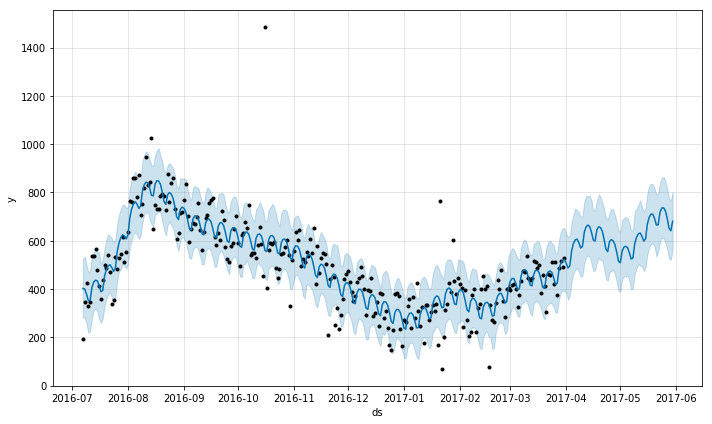

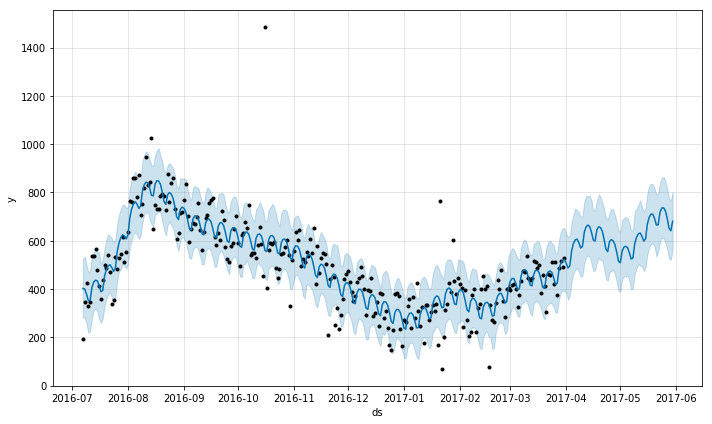

In [5]:
# Plot the forecast vs actuals
m_bikes.plot(forecast)

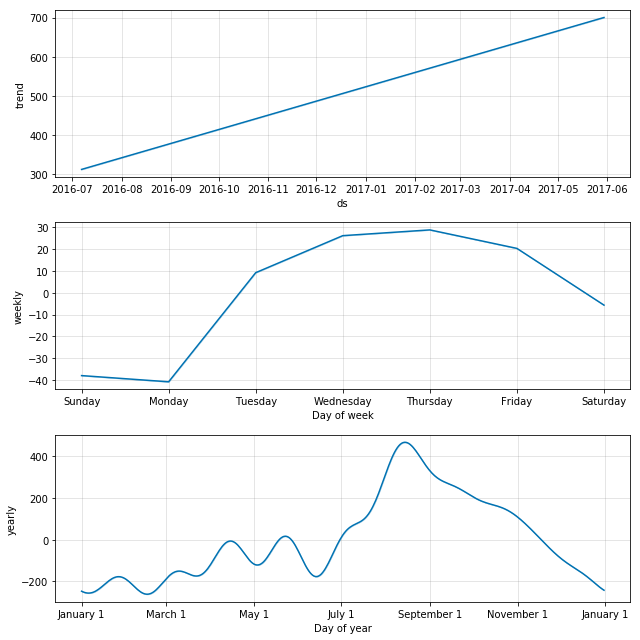

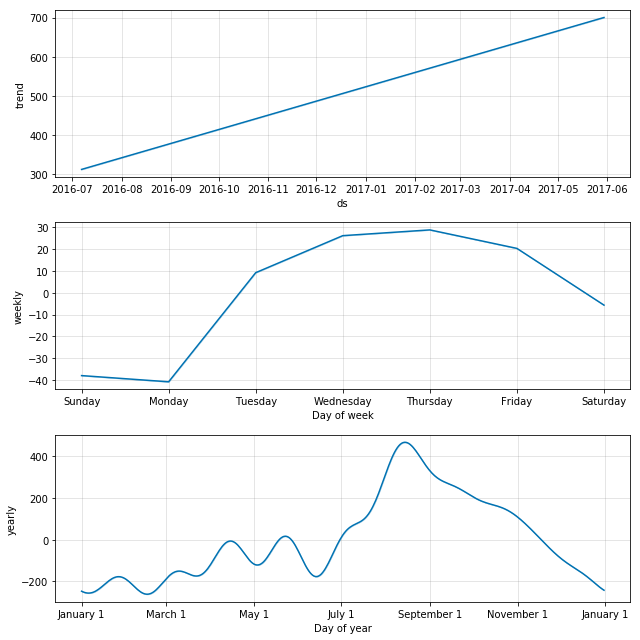

In [6]:
m_bikes.plot_components(forecast)

---

## Graveyard

#### Resources: 
https://facebook.github.io/prophet/


---

## Testing Install with the [Quick Start](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [190]:
import pandas as pd
from fbprophet import Prophet

In [191]:
manning = 'https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv'

In [192]:
df = pd.read_csv(manning)
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [193]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [194]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [195]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.206497    7.431458    8.933918
3266 2017-01-16  8.531523    7.814677    9.208066
3267 2017-01-17  8.318930    7.634110    9.052413
3268 2017-01-18  8.151543    7.476860    8.891555
3269 2017-01-19  8.163477    7.443676    8.860282

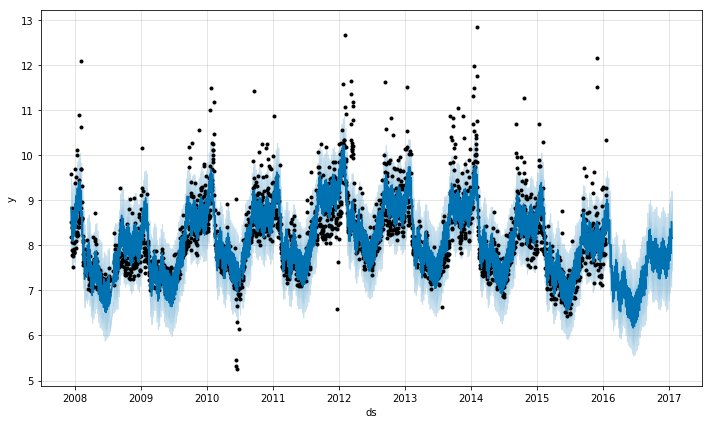

In [196]:
fig1 = m.plot(forecast)

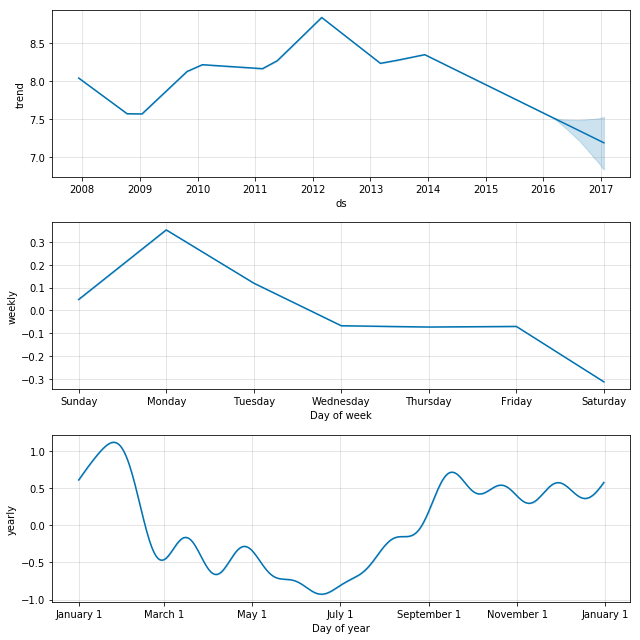

In [10]:
fig2 = m.plot_components(forecast)


---

### Test Data

#### How about NBA API?

In [12]:
from nba_api.stats.endpoints import playercareerstats

In [13]:
# Anthony Davis
career = playercareerstats.PlayerCareerStats(player_id='203076')
career.get_data_frames()[0]

PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0     203076   2012-13        00  1610612740               NOH        20.0   
1     203076   2013-14        00  1610612740               NOP        21.0   
2     203076   2014-15        00  1610612740               NOP        22.0   
3     203076   2015-16        00  1610612740               NOP        23.0   
4     203076   2016-17        00  1610612740               NOP        24.0   
5     203076   2017-18        00  1610612740               NOP        25.0   
6     203076   2018-19        00  1610612740               NOP        26.0   

   GP  GS     MIN  FGM  ...   FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  \
0  64  60  1846.0  349  ...    0.751   165   357  522   63   75  112   89   
1  67  66  2358.0  522  ...    0.791   207   466  673  105   89  189  109   
2  68  68  2455.0  642  ...    0.805   173   523  696  149  100  200   95   
3  61  61  2164.0  560  ...    0.758   130   497  627  116   78  125  121   
4  75  75  2708.0  770  ...    0.802   172   712  884  157   94  167  181   
5  75  75  2727.0  780  ...    0.828   187   644  831  174  115  193  162   
6  56  56  1850.0  530  ...    0.794   174   498  672  218   88  135  112   

    PF   PTS  
0  158   867  
1  200  1394  
2  141  1656  
3  148  1481  
4  168  2099  
5  159  2110  
6  132  1452  

[7 rows x 27 columns]

In [16]:
from nba_api.stats.endpoints import teamyearbyyearstats

In [24]:
testy = teamyearbyyearstats.TeamYearByYearStats(team_id=1610612744)

In [27]:
this_team = testy.get_data_frames()[0]

In [29]:
this_team.columns

Index(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES',
       'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK'],
      dtype='object')

In [30]:
sel_cols = ['YEAR', 'FG3M']
threes_pls = this_team.loc[:, sel_cols]

In [34]:
threes_pls = threes_pls.loc[threes_pls['FG3M']!=0,:]

In [35]:
threes_pls

YEAR  FG3M
33  1979-80    27
34  1980-81    60
35  1981-82    91
36  1982-83    34
37  1983-84    55
38  1984-85   112
39  1985-86    87
40  1986-87   116
41  1987-88    91
42  1988-89   194
43  1989-90   243
44  1990-91   270
45  1991-92   254
46  1992-93   298
47  1993-94   291
48  1994-95   546
49  1995-96   447
50  1996-97   481
51  1997-98   189
52  1998-99   162
53  1999-00   345
54  2000-01   282
55  2001-02   320
56  2002-03   425
57  2003-04   429
58  2004-05   624
59  2005-06   625
60  2006-07   700
61  2007-08   761
62  2008-09   550
63  2009-10   633
64  2010-11   685
65  2011-12   524
66  2012-13   658
67  2013-14   774
68  2014-15   883
69  2015-16  1077
70  2016-17   982
71  2017-18   926
72  2018-19  1087

In [36]:
import seaborn as sns

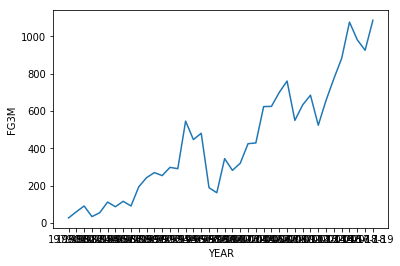

In [37]:
sns.lineplot(threes_pls['YEAR'],threes_pls['FG3M'])

In [38]:
threes_pls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 33 to 72
Data columns (total 2 columns):
YEAR    40 non-null object
FG3M    40 non-null int64
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [42]:
threes_pls['year_clean'] = threes_pls['YEAR'].str.slice(0,4) + '-12-31'

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
threes_pls['year_dt'] = pd.to_datetime(threes_pls['year_clean'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
threes_pls.head()

YEAR  FG3M  year_clean    year_dt
33  1979-80    27  1979-12-31 1979-12-31
34  1980-81    60  1980-12-31 1980-12-31
35  1981-82    91  1981-12-31 1981-12-31
36  1982-83    34  1982-12-31 1982-12-31
37  1983-84    55  1983-12-31 1983-12-31

In [47]:
threes_pls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 33 to 72
Data columns (total 4 columns):
YEAR          40 non-null object
FG3M          40 non-null int64
year_clean    40 non-null object
year_dt       40 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
from nba_api.stats.library.data import teams

In [23]:
teams[7]

[1610612744,
 'GSW',
 'Warriors',
 1946,
 'Golden State',
 'Golden State Warriors',
 'California']

In [48]:
threes_pls

YEAR  FG3M  year_clean    year_dt
33  1979-80    27  1979-12-31 1979-12-31
34  1980-81    60  1980-12-31 1980-12-31
35  1981-82    91  1981-12-31 1981-12-31
36  1982-83    34  1982-12-31 1982-12-31
37  1983-84    55  1983-12-31 1983-12-31
38  1984-85   112  1984-12-31 1984-12-31
39  1985-86    87  1985-12-31 1985-12-31
40  1986-87   116  1986-12-31 1986-12-31
41  1987-88    91  1987-12-31 1987-12-31
42  1988-89   194  1988-12-31 1988-12-31
43  1989-90   243  1989-12-31 1989-12-31
44  1990-91   270  1990-12-31 1990-12-31
45  1991-92   254  1991-12-31 1991-12-31
46  1992-93   298  1992-12-31 1992-12-31
47  1993-94   291  1993-12-31 1993-12-31
48  1994-95   546  1994-12-31 1994-12-31
49  1995-96   447  1995-12-31 1995-12-31
50  1996-97   481  1996-12-31 1996-12-31
51  1997-98   189  1997-12-31 1997-12-31
52  1998-99   162  1998-12-31 1998-12-31
53  1999-00   345  1999-12-31 1999-12-31
54  2000-01   282  2000-12-31 2000-12-31
55  2001-02   320  2001-12-31 2001-12-31
56  2002-03   425  2002-12-31 2002-12-31
57  2003-04   429  2003-12-31 2003-12-31
58  2004-05   624  2004-12-31 2004-12-31
59  2005-06   625  2005-12-31 2005-12-31
60  2006-07   700  2006-12-31 2006-12-31
61  2007-08   761  2007-12-31 2007-12-31
62  2008-09   550  2008-12-31 2008-12-31
63  2009-10   633  2009-12-31 2009-12-31
64  2010-11   685  2010-12-31 2010-12-31
65  2011-12   524  2011-12-31 2011-12-31
66  2012-13   658  2012-12-31 2012-12-31
67  2013-14   774  2013-12-31 2013-12-31
68  2014-15   883  2014-12-31 2014-12-31
69  2015-16  1077  2015-12-31 2015-12-31
70  2016-17   982  2016-12-31 2016-12-31
71  2017-18   926  2017-12-31 2017-12-31
72  2018-19  1087  2018-12-31 2018-12-31

In [75]:
feed = pd.DataFrame(data=threes_pls[['year_dt','FG3M']])

In [78]:
feed.rename({'year_dt': 'ds', 'FG3M': 'y'}, axis=1, inplace=True)

In [79]:
feed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 33 to 72
Data columns (total 2 columns):
ds    40 non-null datetime64[ns]
y     40 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [80]:
m_gsw = Prophet()
m_gsw.fit(feed)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [82]:
future = m_gsw.make_future_dataframe(periods=365)
future.tail()

ds
400 2019-12-27
401 2019-12-28
402 2019-12-29
403 2019-12-30
404 2019-12-31

In [83]:
forecast = m_gsw.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower   yhat_upper
400 2019-12-27  963.289946  830.818794  1103.417336
401 2019-12-28  958.292401  811.680562  1101.216639
402 2019-12-29  953.898080  809.228142  1084.496219
403 2019-12-30  950.192854  808.473375  1089.918916
404 2019-12-31  947.249730  811.905529  1089.708611

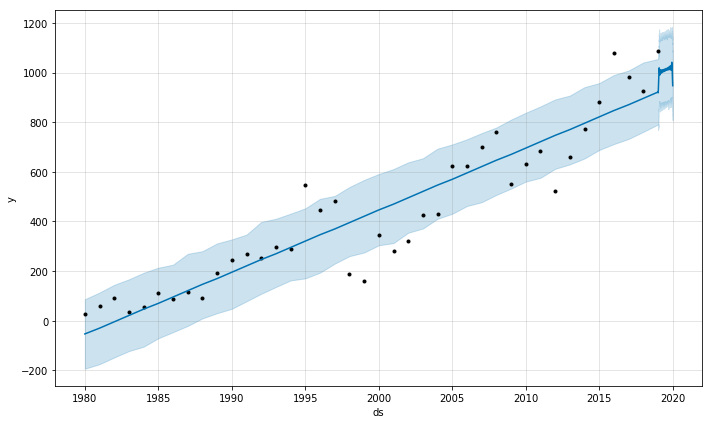

In [85]:
fig1 = m_gsw.plot(forecast)

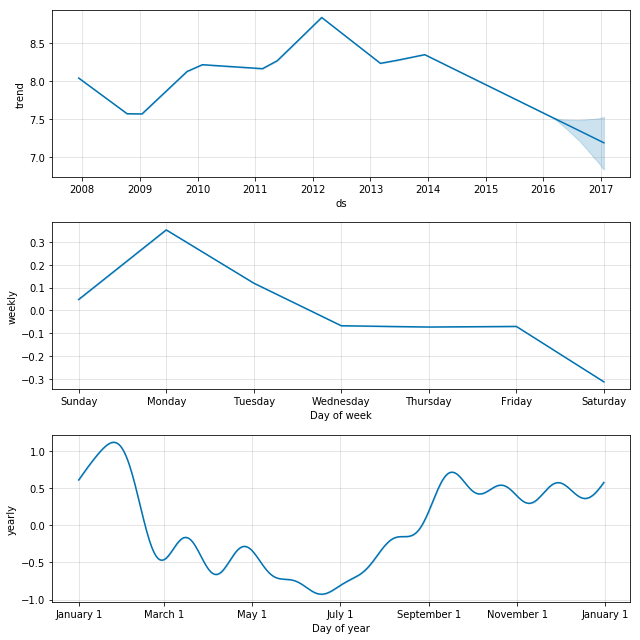

In [10]:
fig2 = m.plot_components(forecast)


---

In [1]:
!ls

LICENSE
Untitled.ipynb
blog_tutorial.ipynb
ignore
los-angeles-metro-bike-share-trip-data.zip
metro-bike-share-trip-data.csv
socrata_metadata.json


## Seattle - Bridging the Gap data

In [91]:
ballard = pd.read_csv('Bridging_The_Gap_Accomplishments_2007_to_2011.csv')

In [92]:
ballard.head()

HISTKEY  COMPKEY  COMPTYPE  ACTKEY ACTCODE PROJECT_ID  \
0    21773    29561        13    1034  B-XWRM   TG355310   
1    50596    11053        68    1026  B-XWRM   TG355310   
2    50497    11053        68    1026  B-XWRM   TG355310   
3    12964    12892        68    1005  B-RDPV   TC365440   
4    18894    35927        13    1034  B-XWRM   TG355310   

                              PROJECT_NA          PROGRAM_NA  \
0              Curb and Pavement Marking  Signs and Markings   
1              Curb and Pavement Marking  Signs and Markings   
2              Curb and Pavement Marking  Signs and Markings   
3  Arterial Asphalt and Concrete Program               Roads   
4              Curb and Pavement Marking  Signs and Markings   

                DIVISION_N BTG_GROUP    ...    GROUPNAME  GROUPFLAG  \
0  SDOT-TRAFFIC MANAGEMENT    Safety    ...          NaN          0   
1  SDOT-TRAFFIC MANAGEMENT    Safety    ...          NaN          0   
2  SDOT-TRAFFIC MANAGEMENT    Safety    ...          NaN          0   
3    SDOT-CAPITAL PROJECTS    Paving    ...          NaN          0   
4  SDOT-TRAFFIC MANAGEMENT    Safety    ...          NaN          0   

     RUN_DATE   WONO  CRA_NO CRA_GRP    GEN_ALIAS  \
0  10/14/2011  21773    13.1      13     Belltown   
1  10/14/2011  50596     6.1       6   First Hill   
2  10/14/2011  50497     6.1       6   First Hill   
3  10/14/2011  12964     3.2       3   Georgetown   
4  10/14/2011  18894     9.5       9  Haller Lake   

                                DETL_NAMES         NEIGHDIST Data Link  
0                  Belltown, Denny Regrade          Downtown       NaN  
1  First Hill, Yesler Terrace, Squire Park              East       NaN  
2  First Hill, Yesler Terrace, Squire Park              East       NaN  
3                               Georgetown  Greater Duwamish       NaN  
4                   Haller Lake, Pinehurst         Northwest       NaN  

[5 rows x 27 columns]

In [93]:
ballard.columns

Index(['HISTKEY', 'COMPKEY', 'COMPTYPE', 'ACTKEY', 'ACTCODE', 'PROJECT_ID',
       'PROJECT_NA', 'PROGRAM_NA', 'DIVISION_N', 'BTG_GROUP', 'LONG_DESC',
       'QTY', 'UNIT_OF_ME', 'COMPDTTM', 'COMPYEAR', 'SECTOR', 'LOCATION',
       'GROUPNAME', 'GROUPFLAG', 'RUN_DATE', 'WONO', 'CRA_NO', 'CRA_GRP',
       'GEN_ALIAS', 'DETL_NAMES', 'NEIGHDIST', 'Data Link'],
      dtype='object')

In [94]:
ballard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33146 entries, 0 to 33145
Data columns (total 27 columns):
HISTKEY       33146 non-null int64
COMPKEY       33146 non-null int64
COMPTYPE      33146 non-null int64
ACTKEY        33146 non-null int64
ACTCODE       33146 non-null object
PROJECT_ID    33146 non-null object
PROJECT_NA    33146 non-null object
PROGRAM_NA    33146 non-null object
DIVISION_N    33146 non-null object
BTG_GROUP     33146 non-null object
LONG_DESC     33146 non-null object
QTY           33146 non-null int64
UNIT_OF_ME    33146 non-null object
COMPDTTM      33146 non-null object
COMPYEAR      33146 non-null int64
SECTOR        33122 non-null object
LOCATION      33146 non-null object
GROUPNAME     502 non-null object
GROUPFLAG     33146 non-null int64
RUN_DATE      33146 non-null object
WONO          33146 non-null int64
CRA_NO        33146 non-null float64
CRA_GRP       33146 non-null int64
GEN_ALIAS     33130 non-null object
DETL_NAMES    33130 non-null object
N

In [95]:
ballard['COMPTYPE'].value_counts()

68    19614
13    13532
Name: COMPTYPE, dtype: int64

In [96]:
ballard['COMPKEY'].value_counts()

26772     1264
29213      931
31951      507
37930      496
37258      334
31526      316
9050       246
6170       194
1973       140
10152      134
37264      121
15356      116
11179      110
10185      106
9421       104
13342      104
24912       94
17380       90
32207       90
26579       87
31444       85
270154      84
1000        84
13541       82
2090        82
12763       80
24803       80
11587       80
4396        80
10664       80
          ... 
27816        1
24019        1
34344        1
27144        1
28405        1
29919        1
485928       1
32421        1
30372        1
33365        1
24930        1
36128        1
36617        1
37495        1
32503        1
31370        1
36585        1
36393        1
163397       1
24129        1
31402        1
29355        1
32293        1
269714       1
36379        1
37623        1
31498        1
32343        1
37655        1
32320        1
Name: COMPKEY, Length: 7680, dtype: int64

In [97]:
ballard['COMPDTTM'].head()

0    10/01/2009
1    07/26/2011
2    08/01/2011
3    05/19/2007
4    06/20/2008
Name: COMPDTTM, dtype: object

In [105]:
ballard['dts'] = pd.to_datetime(ballard['COMPDTTM'], format='%m/%d/%Y')

In [54]:
trips_ct = bikes.groupby(['st_str']).agg({'Trip ID': 'count'}).reset_index()

In [113]:
zzzzzzzz = ballard.groupby(['dts']).agg({'COMPKEY': 'count'}).reset_index()

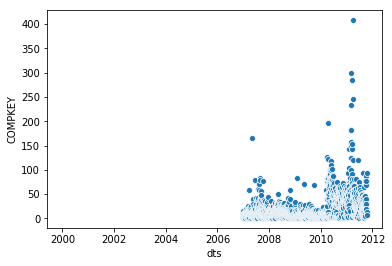

In [114]:
sns.scatterplot(zzzzzzzz['dts'],zzzzzzzz['COMPKEY'])

In [109]:
ballard.COMPYEAR.value_counts()

2011    10886
2010    10438
2007     4738
2008     4195
2009     2593
2005      292
2012        2
2020        2
Name: COMPYEAR, dtype: int64

In [110]:
ballard = ballard.loc[ballard['COMPYEAR'].isin([2007, 2008, 2009, 2010, 2011]),:].copy()

In [111]:
ballard.COMPYEAR.value_counts()

2011    10886
2010    10438
2007     4738
2008     4195
2009     2593
Name: COMPYEAR, dtype: int64

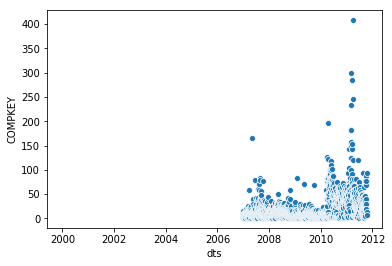

In [122]:
sns.scatterplot(zzzzzzzz['dts'],zzzzzzzz['COMPKEY'])
import matplotlib.pyplot as plt


In [119]:
import datetime

datenow = datetime.datetime.now()
dstart = datetime.datetime(2007,1,1)
dend = datetime.datetime(2011,12,31)

(732677.0, 734502.0)

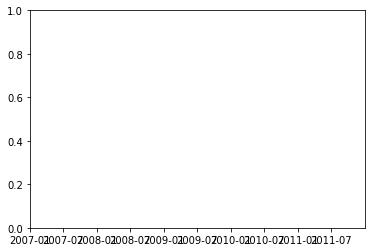

In [123]:
import matplotlib.pyplot as plt
plt.xlim(dstart, dend)

In [127]:
px.scatter(data_frame=improves
          ,x='dts'
          ,y='COMPKEY'
          ,opacity=0.3
          )

In [124]:
improves = ballard.groupby(['dts']).agg({'COMPKEY': 'count'}).reset_index()

In [ ]:
improves['dts']
improves['COMPKEY']

In [128]:
ballard.head()

HISTKEY  COMPKEY  COMPTYPE  ACTKEY ACTCODE PROJECT_ID  \
0    21773    29561        13    1034  B-XWRM   TG355310   
1    50596    11053        68    1026  B-XWRM   TG355310   
2    50497    11053        68    1026  B-XWRM   TG355310   
3    12964    12892        68    1005  B-RDPV   TC365440   
4    18894    35927        13    1034  B-XWRM   TG355310   

                              PROJECT_NA          PROGRAM_NA  \
0              Curb and Pavement Marking  Signs and Markings   
1              Curb and Pavement Marking  Signs and Markings   
2              Curb and Pavement Marking  Signs and Markings   
3  Arterial Asphalt and Concrete Program               Roads   
4              Curb and Pavement Marking  Signs and Markings   

                DIVISION_N BTG_GROUP    ...     GROUPFLAG    RUN_DATE   WONO  \
0  SDOT-TRAFFIC MANAGEMENT    Safety    ...             0  10/14/2011  21773   
1  SDOT-TRAFFIC MANAGEMENT    Safety    ...             0  10/14/2011  50596   
2  SDOT-TRAFFIC MANAGEMENT    Safety    ...             0  10/14/2011  50497   
3    SDOT-CAPITAL PROJECTS    Paving    ...             0  10/14/2011  12964   
4  SDOT-TRAFFIC MANAGEMENT    Safety    ...             0  10/14/2011  18894   

  CRA_NO  CRA_GRP    GEN_ALIAS                               DETL_NAMES  \
0   13.1       13     Belltown                  Belltown, Denny Regrade   
1    6.1        6   First Hill  First Hill, Yesler Terrace, Squire Park   
2    6.1        6   First Hill  First Hill, Yesler Terrace, Squire Park   
3    3.2        3   Georgetown                               Georgetown   
4    9.5        9  Haller Lake                   Haller Lake, Pinehurst   

          NEIGHDIST  Data Link        dts  
0          Downtown        NaN 2009-10-01  
1              East        NaN 2011-07-26  
2              East        NaN 2011-08-01  
3  Greater Duwamish        NaN 2007-05-19  
4         Northwest        NaN 2008-06-20  

[5 rows x 28 columns]

In [132]:
ballard.loc[ballard['HISTKEY'].isin(['21773'])]

HISTKEY  COMPKEY  COMPTYPE  ACTKEY ACTCODE PROJECT_ID  \
0    21773    29561        13    1034  B-XWRM   TG355310   

                  PROJECT_NA          PROGRAM_NA               DIVISION_N  \
0  Curb and Pavement Marking  Signs and Markings  SDOT-TRAFFIC MANAGEMENT   

  BTG_GROUP    ...     GROUPFLAG    RUN_DATE   WONO CRA_NO  CRA_GRP GEN_ALIAS  \
0    Safety    ...             0  10/14/2011  21773   13.1       13  Belltown   

                DETL_NAMES NEIGHDIST  Data Link        dts  
0  Belltown, Denny Regrade  Downtown        NaN 2009-10-01  

[1 rows x 28 columns]

In [133]:
pets = pd.read_csv('Seattle_Pet_Licenses.csv')

In [135]:
pets.head()

License Issue Date License Number Animal's Name Species  \
0      April 19 2003         200097   Tinkerdelle     Cat   
1   February 07 2006          75432        Pepper     Cat   
2      March 20 2008         135598         Buddy     Dog   
3   December 01 2008         957147       Finigan     Dog   
4      March 29 2011         141222        Jenkey     Dog   

           Primary Breed Secondary Breed ZIP Code  
0     Domestic Shorthair             NaN    98116  
1                   Manx             Mix    98103  
2    Retriever, Labrador             Mix    98133  
3   Spaniel, Irish Water             NaN    98107  
4  Australian Cattle Dog             Mix    98106

In [137]:
pets.loc[pets['Animal\'s Name']=='Bobbie']

License Issue Date License Number Animal's Name Species  \
21237        May 29 2018        S131383        Bobbie     Dog   
28617     August 11 2018         586891        Bobbie     Cat   
44747   February 01 2019        S140141        Bobbie     Cat   

            Primary Breed   Secondary Breed ZIP Code  
21237     Podenco Canario               NaN    98126  
28617  Domestic Shorthair               NaN    98117  
44747             Siamese  American Bobtail    98102

In [138]:
permits = pd.read_csv('Building_Permits.csv')

In [139]:
permits.head()

PermitNum           PermitClass PermitClassMapped PermitTypeMapped  \
0  6259230-CN  Single Family/Duplex       Residential         Building   
1  6338876-CN            Commercial   Non-Residential         Building   
2  6475638-CN            Commercial   Non-Residential         Building   
3  6315465-EX  Single Family/Duplex       Residential         Building   
4  6153042-CN           Multifamily       Residential         Building   

                            PermitTypeDesc  \
0                      Addition/Alteration   
1                      Addition/Alteration   
2                      Addition/Alteration   
3  Environmentally Critical Area Exemption   
4                                      New   

                                         Description  HousingUnits  \
0  Construct deck at east end of existing single ...           NaN   
1  Construct alterations to existing warehouse bu...           NaN   
2  Construct alterations to third level of existi...           NaN   
3  Exception/Exemption Request for: Establish use...           NaN   
4  Construct a 4 story mixed use development with...           NaN   

   HousingUnitsRemoved  HousingUnitsAdded  EstProjectCost  \
0                  0.0                0.0         16223.0   
1                  0.0                0.0         33400.0   
2                  0.0                0.0        200000.0   
3                  NaN                NaN             NaN   
4                  0.0               63.0      10722000.0   

                         ...                         StatusCurrent  \
0                        ...                             Completed   
1                        ...                             Completed   
2                        ...                               Expired   
3                        ...                             Completed   
4                        ...                             Completed   

     OriginalAddress1 OriginalCity OriginalState OriginalZip  \
0    8610 ISLAND DR S      SEATTLE            WA     98118.0   
1      7700 2ND AVE S      SEATTLE            WA     98108.0   
2      6100 4TH AVE S      SEATTLE            WA     98108.0   
3  2139 HARBOR AVE SW      SEATTLE            WA     98126.0   
4  7700 RAINIER AVE S      SEATTLE            WA     98118.0   

  ContractorCompanyName                                               Link  \
0                   NaN  https://cosaccela.seattle.gov/portal/customize...   
1      DACO CORPORATION  https://cosaccela.seattle.gov/portal/customize...   
2      JTM CONSTRUCTION  https://cosaccela.seattle.gov/portal/customize...   
3        JOHN D MCCLOUD  https://cosaccela.seattle.gov/portal/customize...   
4          RAFN COMPANY  https://cosaccela.seattle.gov/portal/customize...   

    Latitude   Longitude                                         Location_1  
0  47.526580 -122.260796  8610 ISLAND DR S\nSEATTLE, WA 98118\n(47.52657...  
1  47.533798 -122.330644  7700 2ND AVE S\nSEATTLE, WA 98108\n(47.5337982...  
2  47.546998 -122.328832  6100 4TH AVE S\nSEATTLE, WA 98108\n(47.5469983...  
3  47.584530 -122.375562  2139 HARBOR AVE SW\nSEATTLE, WA 98126\n(47.584...  
4  47.533477 -122.269490  7700 RAINIER AVE S\nSEATTLE, WA 98118\n(47.533...  

[5 rows x 24 columns]

In [140]:
permits.shape

(127328, 24)

In [141]:
permits.columns

Index(['PermitNum', 'PermitClass', 'PermitClassMapped', 'PermitTypeMapped',
       'PermitTypeDesc', 'Description', 'HousingUnits', 'HousingUnitsRemoved',
       'HousingUnitsAdded', 'EstProjectCost', 'AppliedDate', 'IssuedDate',
       'ExpiresDate', 'CompletedDate', 'StatusCurrent', 'OriginalAddress1',
       'OriginalCity', 'OriginalState', 'OriginalZip', 'ContractorCompanyName',
       'Link', 'Latitude', 'Longitude', 'Location_1'],
      dtype='object')

In [143]:
permits.IssuedDate.head()

0    2010-12-01
1    2013-01-24
2    2015-08-03
3           NaN
4    2012-08-22
Name: IssuedDate, dtype: object

In [145]:
permits.dropna(subset=['IssuedDate'], inplace=True)

In [147]:
permits.IssuedDate.head(50)

0     2010-12-01
1     2013-01-24
2     2015-08-03
4     2012-08-22
5     2012-05-24
6     2011-07-12
7     2010-08-30
8     2015-04-21
9     2007-11-05
10    2013-04-04
11    2013-11-05
12    2019-03-12
13    2006-05-03
14    2010-06-18
15    2005-10-12
20    2006-05-17
21    2008-12-05
23    2010-09-09
24    2015-03-16
25    2013-10-21
26    2016-08-26
27    2015-04-13
28    2015-05-13
29    2005-10-14
31    2013-08-12
32    2010-06-08
34    2007-03-02
35    2006-03-16
36    2008-04-03
37    2018-03-20
39    2018-04-04
40    2008-10-15
42    2017-02-01
44    2014-05-30
45    2016-09-02
46    2014-09-03
47    2015-05-21
50    2010-01-19
54    2013-04-29
56    2007-10-05
57    2007-02-05
58    2013-10-18
59    2006-08-23
60    2007-03-14
61    2014-01-10
63    2012-05-04
64    2016-05-13
65    2018-01-23
66    2008-05-08
67    2018-03-19
Name: IssuedDate, dtype: object

In [150]:
perms = permits.groupby(['IssuedDate']).agg({'PermitNum': 'count'}).reset_index()


In [151]:
perms.columns

Index(['IssuedDate', 'PermitNum'], dtype='object')

In [156]:
perms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 2 columns):
IssuedDate    4097 non-null object
PermitNum     4097 non-null int64
dtypes: int64(1), object(1)
memory usage: 64.1+ KB


In [166]:
px.scatter(data_frame=perms
          ,x='IssuedDate'
          ,y='PermitNum')

In [158]:
perms.columns


Index(['IssuedDate', 'PermitNum'], dtype='object')

In [159]:
perms.IssuedDate.head()

0    1986-07-03
1    1992-06-19
2    1996-10-18
3    1996-11-07
4    1998-12-17
Name: IssuedDate, dtype: object

In [160]:
perms['issue_dt'] = pd.to_datetime(perms['IssuedDate'])

In [163]:
perms['issue_dt'] > '2014-01-01'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4067     True
4068     True
4069     True
4070     True
4071     True
4072     True
4073     True
4074     True
4075     True
4076     True
4077     True
4078     True
4079     True
4080     True
4081     True
4082     True
4083     True
4084     True
4085     True
4086     True
4087     True
4088     True
4089     True
4090     True
4091     True
4092     True
4093     True
4094     True
4095     True
4096     True
Name: issue_dt, Length: 4097, dtype: bool

In [164]:
perms = perms.loc[perms['issue_dt']>='2006-01-01',:].copy()

In [165]:
perms.shape

(3607, 3)

In [169]:
perms = perms[['issue_dt', 'PermitNum']]

In [171]:
perm_feed = perms

In [172]:
perm_feed.columns = ['ds', 'y']
perm_feed.head()

ds   y
490 2006-01-03  17
491 2006-01-04  25
492 2006-01-05  17
493 2006-01-06  35
494 2006-01-09  23

In [183]:
m_perms = Prophet()
m_perms.fit(perm_feed)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [184]:
future = m_perms.make_future_dataframe(periods=60)
future.tail()

ds
3662 2019-07-09
3663 2019-07-10
3664 2019-07-11
3665 2019-07-12
3666 2019-07-13

In [185]:
forecast = m_perms.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
3662 2019-07-09  28.201324   16.168270   39.326720
3663 2019-07-10  30.960366   19.118071   42.966698
3664 2019-07-11  27.151858   15.751236   39.227386
3665 2019-07-12  30.962694   19.829807   43.369241
3666 2019-07-13  12.227257    0.738420   23.783168

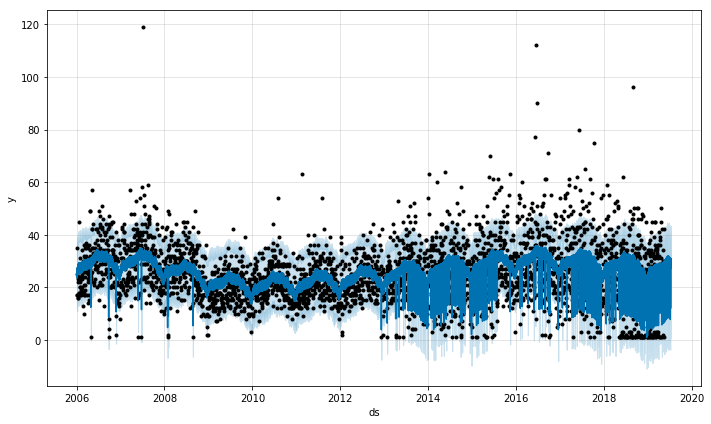

In [186]:
fig1 = m_perms.plot(forecast)

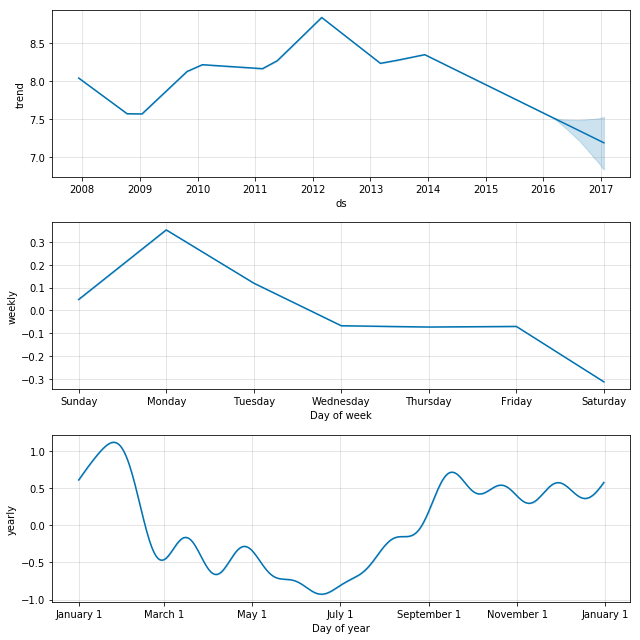

In [10]:
fig2 = m.plot_components(forecast)


---